<a href="https://colab.research.google.com/github/Zuhair0000/Deep_Learning-ANN/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Old Method**

# **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Load Dataset**

In [ ]:
train_df = pd.read_csv("Google_Stock_Price_Train.csv")

In [ ]:
training_set = train_df[['Open']].values

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set = sc.fit_transform(training_set)

# **X_train-y_train Split**

In [ ]:
X_train = []
y_train = []

for i in range(60, 1258):
  X_train.append(training_set[i -60:i, 0])
  y_train.append(training_set[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# **Building RNN**

Import Keras Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Initializing RNN

In [ ]:
regressor = Sequential()

First LSTM layer

In [ ]:
regressor.add(LSTM(units=50, return_sequences= True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Second Layer LSTM

In [ ]:
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

Third Layer LSTM

In [ ]:
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

Fourth Layer LSTM

In [ ]:
regressor.add(LSTM(units=50, return_sequences= False))
regressor.add(Dropout(0.2))

Output layer

In [ ]:
regressor.add(Dense(units=1))

Compile

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

Fit

In [ ]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - loss: 0.1390
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0069
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 0.0070
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0074
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0056
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0056
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0054
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0047
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0047
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0045
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0044
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - loss: 0.0050
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - loss: 0.0035
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0041
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s

# **Making Predictions**

In [ ]:
test_df = pd.read_csv("Google_Stock_Price_Test.csv")
test_set = test_df.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((train_df['Open'], test_df['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
  X_test.append(inputs[i - 60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_pred = regressor.predict(X_test)
y_pred = sc.inverse_transform(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [ ]:
y_pred

array([[1.9901357],
       [1.9901388],
       [1.9901371],
       [1.9901404],
       [1.9901385],
       [1.990138 ],
       [1.99014  ],
       [1.9901414],
       [1.9901414],
       [1.9901428],
       [1.9901438],
       [1.9901452],
       [1.9901466],
       [1.9901478],
       [1.9901495],
       [1.9901474],
       [1.9901495],
       [1.99015  ],
       [1.9901538],
       [1.9901605]], dtype=float32)

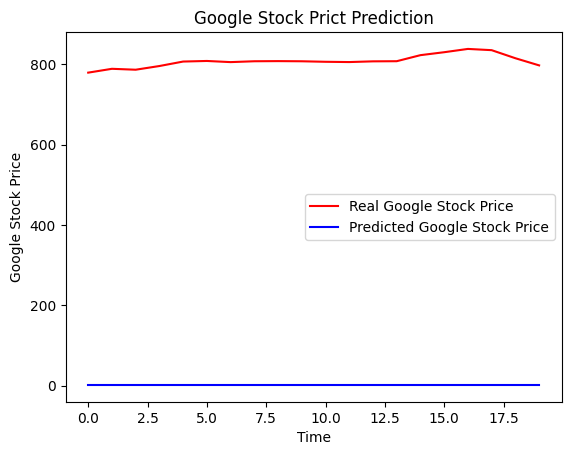

In [ ]:
plt.plot(test_set, color='red', label='Real Google Stock Price')
plt.plot(y_pred, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Prict Prediction')
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# **New Method**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_df = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = train_df[['Open']].values

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
training_set = scaler.fit_transform(training_set)

In [5]:
training_ds = tf.keras.utils.timeseries_dataset_from_array(
    data=training_set[:-1],
    targets=training_set[1:],
    batch_size = 32,
    sequence_length=60
)

training_ds = training_ds.cache().prefetch(tf.data.AUTOTUNE)

In [6]:
rnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(60, 1)),

    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1)
])

In [8]:
rnn.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
rnn.fit(training_ds, epochs=100)

In [9]:
test_df = pd.read_csv("Google_Stock_Price_Test.csv")
test_set = test_df[['Open']].values

In [10]:
combined = pd.concat(
    (train_df[['Open']], test_df[['Open']]),
    axis=0
).values

In [11]:
inputs = scaler.transform(combined)

In [12]:
test_inputs = inputs[-(len(test_df) + 60):]

In [13]:
test_ds = tf.keras.utils.timeseries_dataset_from_array(
    data=test_inputs[:-1],
    targets=test_inputs[1:],
    batch_size=32,
    sequence_length=60,
    shuffle=False
)

test_ds = test_ds.cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
pred_scaled = rnn.predict(test_ds)
predicted_price = scaler.inverse_transform(pred_scaled)